# Introduction machine learning

In [19]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Importing data

The data can be imported using Pandas with the command `pd.read_csv()`.
In many cases, this does not work directly. This is usually due to one of the following issues:
- `FileNotFoundError` --> Either the file name is spelled incorrectly or the path is incorrect.
- `UnicodeDecodeError` --> Either the file name (+path) contains invalid characters (in Windows, for example, "//" must often be used instead of "/"), or the file itself is not saved in the expected "encoding." For the latter, there are two options: (1) Convert the file with an editor. Or (2) set the parameter `encoding=...` parameter.  
There are many possible encodings ([see link](https://docs.python.org/3/library/codecs.html#standard-encodings)), but the most common are "utf-8" (the standard), "ANSI" (on Mac: "iso-8859-1" or ‘ISO8859’) or "ASCII".
- `ParserError` --> Usually means that the "delimiter" (i.e., the separator) is specified incorrectly. It is best to open the file briefly with an editor and check, then set it accordingly with `delimiter="..."` (or `sep="..."`). Typical separators are `","`, `";"`, `"\t"` (tab).
- If the file does not start with the desired column names, this can be corrected by specifying the rows to be skipped --> `skiprows=1` (1, 2, 3,... depending on the case).

## Titanic dataset!

This data is taken from the [Kaggle Titanic challenge](https://www.kaggle.com/c/titanic/data).

Here, we will attempt to predict whether passengers survived the Titanic disaster based on their passenger data.

### Data Dictionary

| Variable   | Definition                        | Key                                        |
|------------|-----------------------------------|--------------------------------------------|
| survival   | Survival                          | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                               |                                            |
| age        | Age in years                      |                                            |
| sibsp      | # of siblings/spouses aboard the Titanic |                                      |
| parch      | # of parents/children aboard the Titanic |                                      |
| ticket     | Ticket number                     |                                            |
| fare       | Passenger fare                    |                                            |
| cabin      | Cabin number                      |                                            |
| embarked   | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of `xx.5`.

- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.


In [20]:
path_data = "Data"
filename = os.path.join(path_data, "titanic_all.csv")

data = pd.read_csv(filename)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# (1) Initial data exploration
This should now be almost automatic.

- Are there any missing values? --> `.info()`
- Initial overview & search for problematic entries --> `.describe()` (or `.describe(include="all")`)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [22]:
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


## Data cleaning
We need to make some decisions here!

- Columns in which we have very few entries --> remove
- Remove columns that we deliberately do not want to use for our predictions --> `Name`, `Ticket`
- Problem case: `Age` --> Here, as an exception, we want to estimate the missing values. This is called **data imputation** and should be avoided in most cases, as it adds generated values, which are essentially *fake data*. However, in this case, please fill in the missing values with `fillna()` using the average age of all other entries.

In [23]:
data_cleaned = data.drop(columns=['Name','Ticket','Cabin'])

In [24]:
data_cleaned['Age'] = data_cleaned['Age'].fillna(data_cleaned['Age'].mean())

In [25]:
data_cleaned = data_cleaned.dropna()

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Sex          1306 non-null   object 
 4   Age          1306 non-null   float64
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Fare         1306 non-null   float64
 8   Embarked     1306 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 102.0+ KB


### Convert categorical data
We still have columns with categorical entries (as strings). These need to be converted to numerical values using `pd.get_dummies`.

Tip: Avoid duplicating the same information. So there is no need for "Sex_male" AND "Sex_female" as one of the two pieces of information is sufficient.

In [ ]:
data_cleaned['Sex'] = data_cleaned['Sex'].replace('male',value=0)
data_cleaned['Sex'] = data_cleaned['Sex'].replace('female',value=1)

C:\Users\Sander\AppData\Local\Temp\ipykernel_10296\1667115185.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['Sex'] = data_cleaned['Sex'].replace('female',value=1)


In [40]:
data_cleaned = pd.get_dummies(data_cleaned) 

In [44]:
data_cleaned= data_cleaned.drop(columns= 'PassengerId')

In [45]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


## Data exploration

In [29]:
# here only mildly informative... but feel free to try
# sb.pairplot(data_cleaned, hue="Survived", diag_kind="hist")

In [43]:
data_cleaned["Survived"].value_counts()

Survived
0    814
1    492
Name: count, dtype: int64

## Correlation matrix

Based solely on correlations: 
**Which features can we expect to play a role in predicting survival (`Survived`)?**

**Which feature appears to be the most important?**

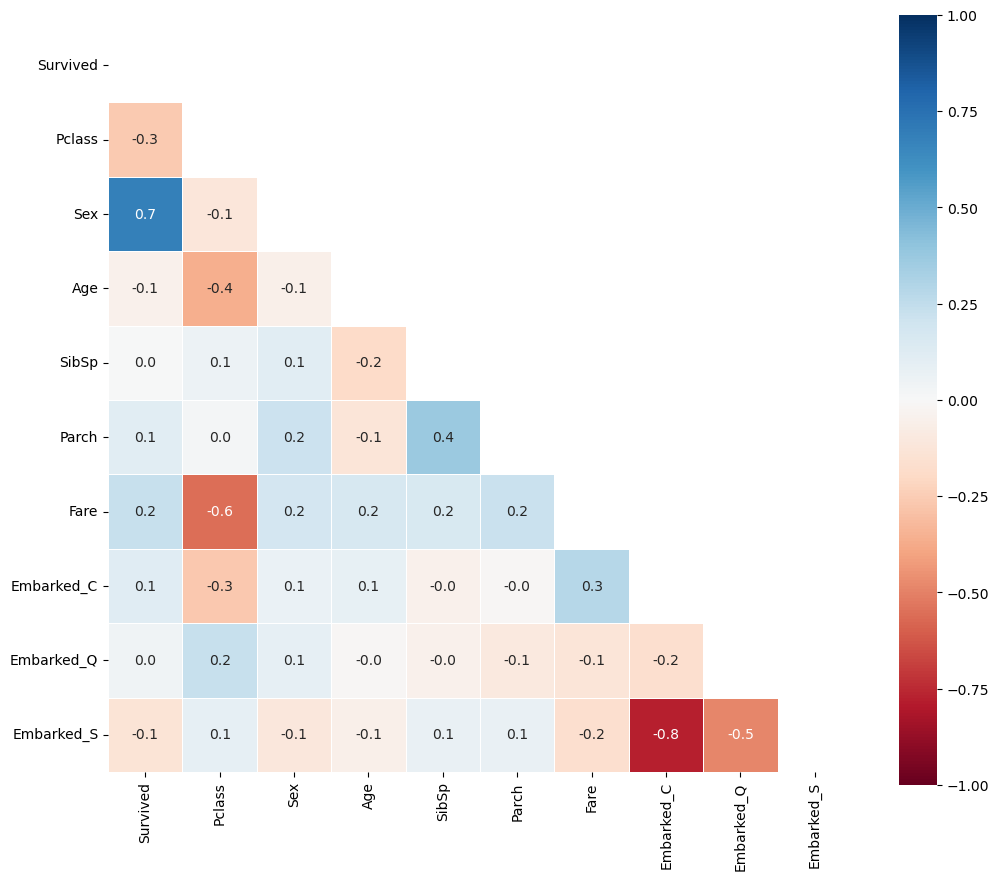

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))

corr_matrix = data_cleaned.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sb.heatmap(corr_matrix,
           mask=mask,
           annot=True,
           vmin=-1, vmax=1,
           square=True,
           cmap="RdBu",
           linewidths=.5, fmt=".1f", ax=ax)

plt.show()

# Split into data and labels

- Label: "Survived" --> 0 did not survive | 1 survived
- Data: Everything except "Survived" --> `.drop()`

### Tasks:
- Create the data `X` and the labels `y` from `data`.

In [47]:
# label
y = data_cleaned["Survived"]

# data
X = data_cleaned.drop(["Survived"], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,3,0,35.0,0,0,8.0500,False,False,True


## Train-test split
The scikit-learn function `train_test_split` randomly divides a data set into training and test data. We can specify the proportion of test data using `test_size=...`, where values between 0 (no data) and 1 (all data) are used.
See also the [Scikit-Learn documentation on train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Since this is a random distribution, it is better to set a "seed" to make it reproducible, using `random_state=0` (or another number).

In [48]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((979, 9), (327, 9))

# Training of a kNN model
## Scaling data

For some algorithms, it is very important that the data is all scaled similarly. This is also the case for k-nearest neighbors, for example. To do this, we again use the `StandardScaler` from Scikit-Learn.

The "cleanest" approach here is to perform the scaling **based on the training data** so that no indirect information from the test data is included.

In [49]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),
                       columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X.columns)

In [50]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.836785,-0.729439,-0.007126,-0.467720,-0.447478,-0.361104,-0.509877,-0.316228,0.650358
1,-0.362648,1.370916,-1.381861,-0.467720,-0.447478,-0.335774,-0.509877,-0.316228,0.650358
2,-1.562080,-0.729439,-0.151751,-0.467720,-0.447478,0.299505,-0.509877,-0.316228,0.650358
3,0.836785,-0.729439,-0.613042,-0.467720,-0.447478,-0.494932,-0.509877,-0.316228,0.650358
4,0.836785,1.370916,-0.007126,6.917726,1.888954,0.754433,-0.509877,-0.316228,0.650358


# Train model
First, we will try out a k-nearest neighbor model, again using scikit-learn. See [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier).
The most important parameter is `n_neighbors`, i.e., the number of neighbors (the `k` in k-NN).

### Task:
- Train a k-nearest neighbor model with the training data. This means creating a `KNeighborsClassifier` object (with the necessary parameters) and then training it with `.fit()`.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

## Making predictions
While we train a model with `.fit()`, we can make predictions with `.predict()`.

In [53]:
prediction_survival = knn.predict(X_test)

In [56]:
prediction_survival

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,

## Evaluate results

A good way to check classification predictions is the confusion matrix.To do thisconfusion_matrix()and pass it the actual labels and the predicted labels as parameters.

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(prediction_survival, y_test)

array([[171,  26],
       [ 29, 101]])

In [57]:
# Check which prediction classes were learnt by the model
knn.classes_

array([0, 1])

<Axes: >

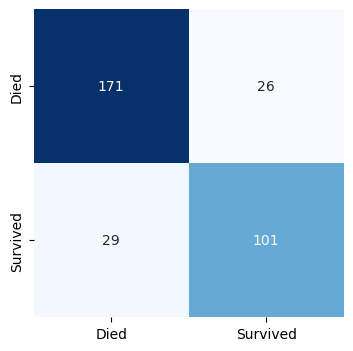

In [58]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(prediction_survival, y_test),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

# Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

In [59]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
) 

# Important! Decision trees need no data scaling!!

In [60]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
760,3,0,29.881138,0,0,14.5000,False,False,True
1011,2,1,12.000000,0,0,15.7500,False,False,True
83,1,0,28.000000,0,0,47.1000,False,False,True
521,3,0,22.000000,0,0,7.8958,False,False,True
863,3,1,29.881138,8,2,69.5500,False,False,True


### First train a decision tree WITHOUT setting any parameters!

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()  # do NOT add any parameters here --> we will use the default settings
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Now let's make some predictions...
prediction_survival = tree.predict(X_test)

<Axes: >

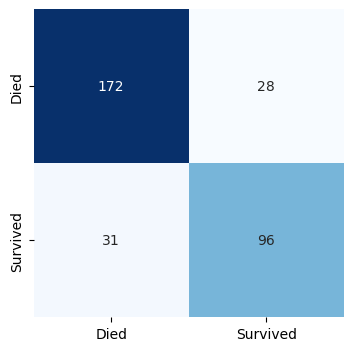

In [63]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_test, prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

### Evaluation:
Looks like the model is pretty good. What else would we need to check to be sure?

- Take a look at the same thing, but this time for the test set.

# Train model
Here is a decision tree model, again using scikit-learn. See [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).
The most important parameter is `max_depth`, i.e., the maximum depth of the tree.

### Task:
- Train a decision tree model with the training data and a maximum depth of 2.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = # add own code

## Evaluate results

### Tasks:
Just as with the kNN model, the task here is to:
- Make predictions based on the test data
- Compare these with the actual values using a confusion matrix.

In [ ]:
prediction_survival = # add own code
prediction_survival

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(# add own code)

## Interesting facts about decision trees:
A popular feature of decision trees is that we can also display the trees themselves!

In [ ]:
X_train.columns

In [ ]:
from sklearn.tree import plot_tree

feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

### Task:
- Run the same game again, but this time with a tree depth of 4.

In [ ]:
tree = DecisionTreeClassifier(# add own code)
# train model


In [ ]:
prediction_survival = # add own code

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
X_train.columns

In [ ]:
feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()